Time of generation =  0.003000497817993164


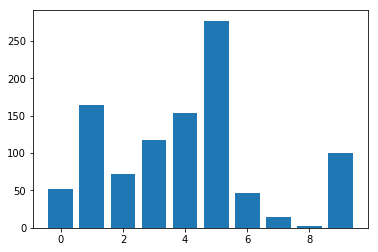

In [5]:
#Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167,
#0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните
#время генерации выборки с неупорядоченными и упорядоченными весами.
#неупорядоченные веса
import matplotlib.pyplot as plt
import numpy as np
import time
start = time.time()
a = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
a/=a.sum()
b = [a[:i].sum() for i in range(1,11)]
r = [np.random.rand() for i in range(1000)]
c = []
for i in range(1000):
    k=0
    while k!=-1:
        if r[i]<b[k]:
            c.append(k)
            k=-1
        else:
            k+=1
end = time.time()
print("Time of generation = ", end-start)
plt.bar(np.arange(10), [c.count(i) for i in range(10)])
plt.show()

Time of generation =  0.0020003318786621094


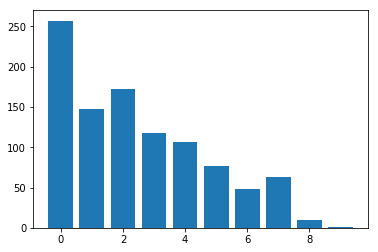

In [6]:
#упорядоченные веса
start = time.time()
a = np.sort(a)[::-1]
b = [a[:i].sum() for i in range(1,11)]
r = [np.random.rand() for i in range(1000)]
c = []
for i in range(1000):
    k=0
    while k!=-1:
        if r[i]<b[k]:
            c.append(k)
            k=-1
        else:
            k+=1
end = time.time()
print("Time of generation = ", end-start)
plt.bar(np.arange(10), [c.count(i) for i in range(10)])
plt.show()

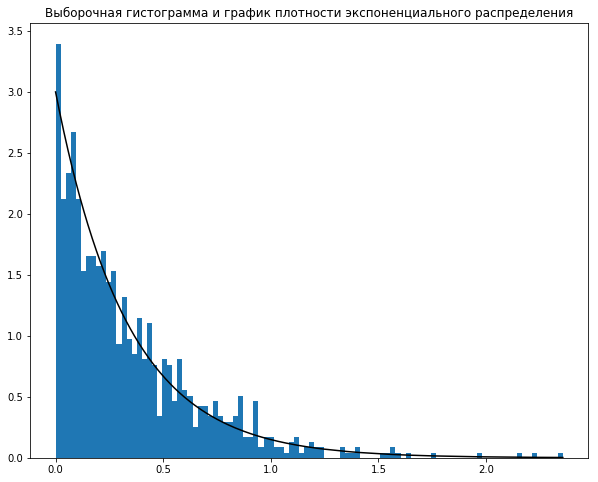

In [7]:
#Смоделируйте выборку размера 1000 из распределения  Exp(λ). Постройте выборочную гистограмму и точный график плотности
#распределения.
from math import log, exp
plt.figure(figsize=(10,8))
a = 3
rand = [np.random.rand() for i in range(1000)]
rand.sort()

rx = [-1/a*log(1-rand[i]) for i in range(1000)]
plt.hist(rx, density=True, bins = 100)

pl = [a*exp(-a*rx[i]) for i in range(1000)]
plt.title("Выборочная гистограмма и график плотности экспоненциального распределения")
plt.plot(rx, pl, color = 'black')
plt.show()

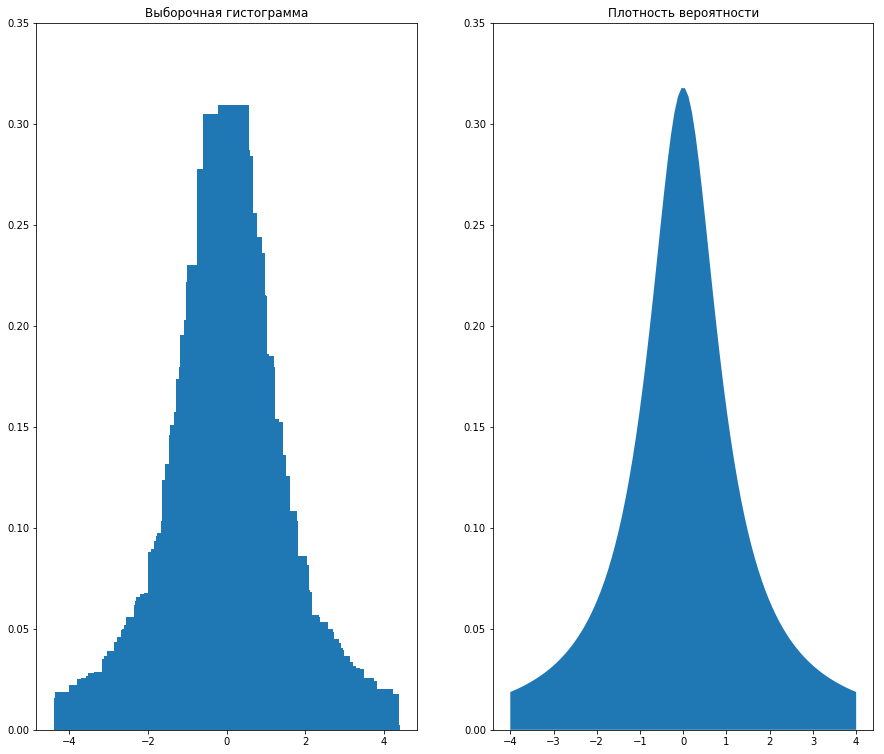

In [8]:
#Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из
#усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной
#выборочной гистограммы и сравните его с графиком точной функции плотности
from scipy import stats
from math import pi
rand = [8*np.random.rand()-4 for i in range(1000)]
rand.sort()
cau = []
k=0
while k!=1000:
    z = 1/pi*np.random.rand()
    if z < 1/(pi*(1+rand[k]*rand[k])):
        cau.append(z)
        k+=1

plt.figure(figsize=(15,13))
plt.subplot(1,2,1)
plt.title("Выборочная гистограмма")
plt.ylim(bottom=0)
plt.ylim(top=0.35)
plt.bar(rand, cau)

plt.subplot(1,2,2)
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.title("Плотность вероятности")
plt.ylim(bottom=0)
plt.ylim(top=0.35)
plt.fill_between(x, 0, dist.pdf(x))

plt.show()

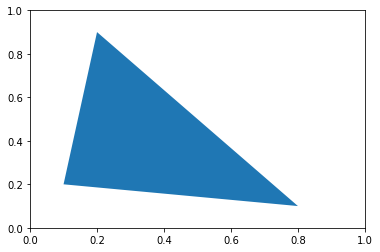

In [9]:
#Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

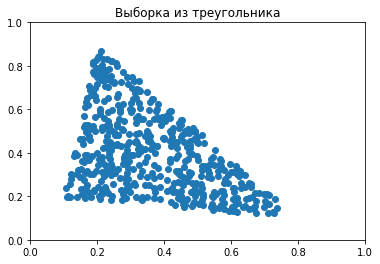

In [10]:
import math
xrand = np.array([np.random.rand() for i in range(500)])
yrand = np.array([np.random.rand() for i in range(500)])

for i in range(500):
    if yrand[i]>-xrand[i]+1:
        xrand[i]=-xrand[i]+1
        yrand[i]=-yrand[i]+1
        
xrand*=math.hypot(0.7, 0.1)
yrand*=math.hypot(0.7, 0.1)

a = math.atan2(-1, 7)
x = xrand
xrand = xrand*math.cos(a)-yrand*math.sin(a)+0.1
yrand = x*math.sin(a)+yrand*math.cos(a)+0.2

plt.scatter(xrand, yrand)
plt.xlim(left=0)
plt.xlim(right=1)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.title("Выборка из треугольника")
plt.show()

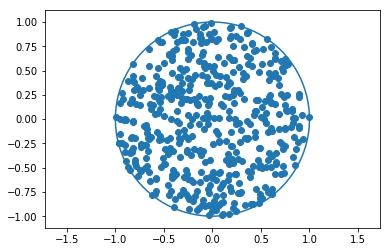

In [11]:
#Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)

arand = 2*pi*np.random.rand(1, 500)
rrand = np.sqrt(np.random.rand(1, 500))

xrand = rrand*np.cos(arand)
yrand = rrand*np.sin(arand)

plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.scatter(xrand, yrand)
plt.show()

In [12]:
#Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке
#(0, 0). Приведите графики выборочных траекторий для n=100.
eps = 0.000001
def walk(xmass, ymass, n):
    while (len(xmass)-1)!=n:
        xmass = [0, np.sqrt(1/2)*np.random.choice([-1,1])]
        ymass = [0, np.sqrt(1/2)*np.random.choice([-1,1])]
        while (xmass[len(xmass)-1]**2+ymass[len(ymass)-1]**2)>eps and (len(xmass)-1)<=n:
            xmass.append(xmass[len(xmass)-1]+np.sqrt(1/2)*np.random.choice([-1,1]))
            ymass.append(ymass[len(ymass)-1]+np.sqrt(1/2)*np.random.choice([-1,1]))
    xx = np.array(xmass)
    ymass = np.array(ymass)
    xmass = xx*math.cos(-pi/4)-ymass*math.sin(-pi/4)
    ymass = xx*math.sin(-pi/4)+ymass*math.cos(-pi/4)
    plt.plot(xmass, ymass)
    plt.show()

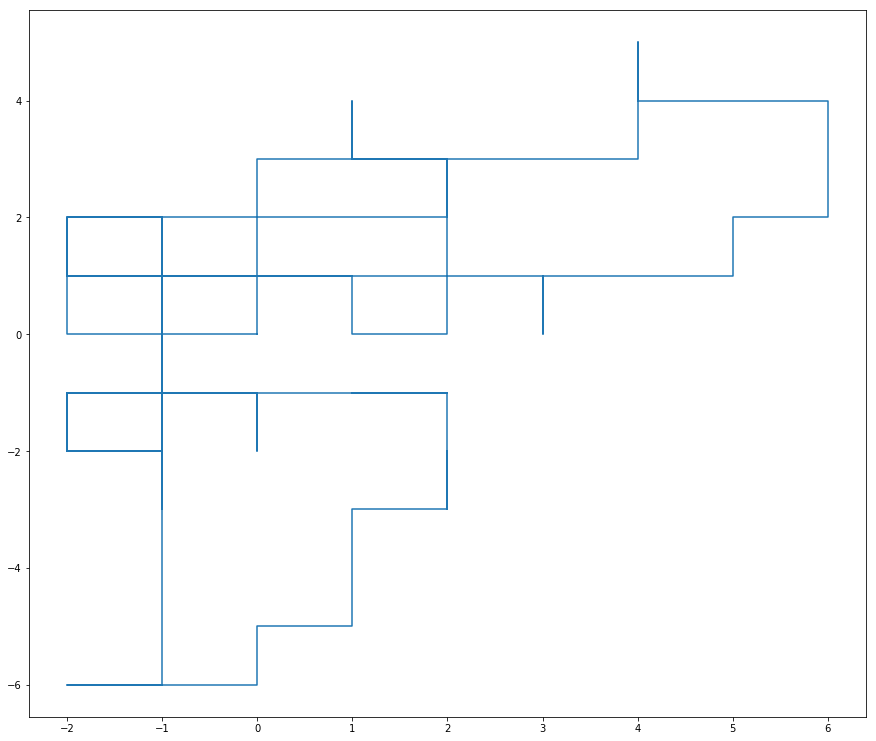

In [13]:
plt.figure(figsize=(15,13))
xmass = [0, np.sqrt(1/2)*np.random.choice([-1,1])]
ymass = [0, np.sqrt(1/2)*np.random.choice([-1,1])]
walk(xmass, ymass, 100)

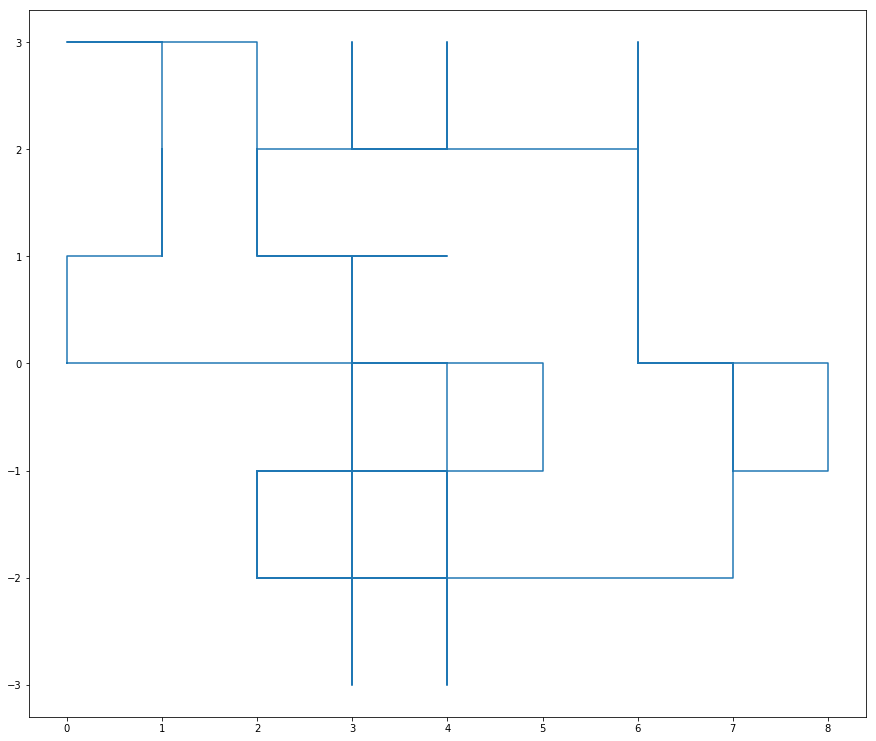

In [14]:
plt.figure(figsize=(15,13))
xmass = [0, np.sqrt(1/2)*np.random.choice([-1,1])]
ymass = [0, np.sqrt(1/2)*np.random.choice([-1,1])]
walk(xmass, ymass, 100)

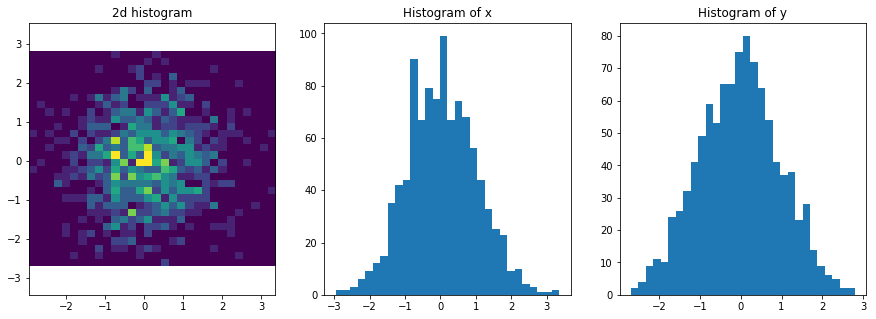

In [65]:
#Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин.
#Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модивицированного метода
#смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1),
#(1, 4)). Постройте 2D гистограмму полученного распределения.
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

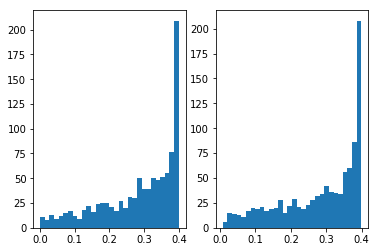

In [66]:
#Полученная выборочная гистограмма похожа на плотность R(0, sqrt(2*pi)) равномерного распределения на отрезке, которая равна
#1/sqrt(2*pi). Но поскольку у нас распределение только приближенно похоже на N(0,1), то при подстановке х и у в выражение
#плотности N(0,1), значения получаются преимущественно 1/sqrt(2*pi). То есть, у нас действительно по заданным формулам получаются
#N(0,1) независимые случаные величины
rx = np.sqrt(1/(2*pi))*np.exp(-x**2/2)
ry = np.sqrt(1/(2*pi))*np.exp(-y**2/2)

plt.subplot(1,2,1)
plt.hist(rx, bins = 30)
plt.subplot(1,2,2)
plt.hist(ry, bins = 30)
plt.show()

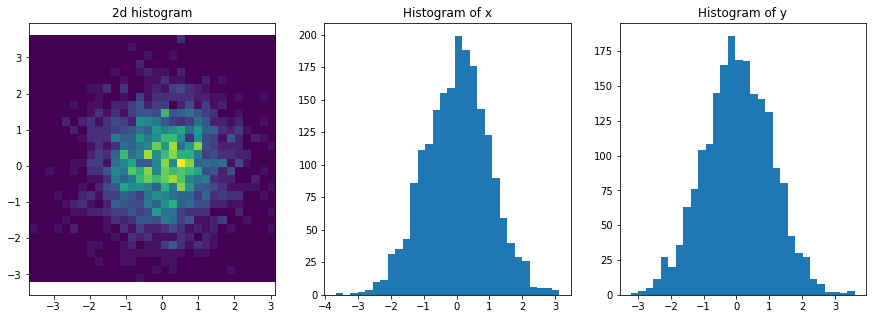

In [67]:
#Модифицруем метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos.
n = 2000
i = 0
u1 = np.array([])
u2 = np.array([])
while i<n:
    u, v = 2*np.random.rand(2,1)-1
    s1 = u**2+v**2
    if 0<s1<=1:
        u1 = np.append(u1, u)
        u2 = np.append(u2, v)
        i+=1

s = u1**2+u2**2
r = np.sqrt(-2 * np.log(s)/s)
x = u1 * r
y = u2 * r
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

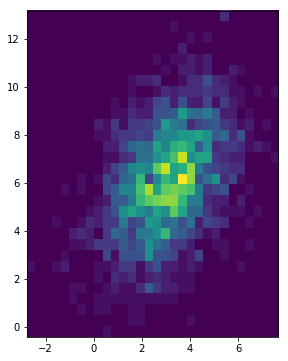

In [81]:
#С помощью модивицированного метода смоделируем выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и
#ковариационной матрицей ((2, 1), (1, 4)). Построим 2D гистограмму полученного распределения.
#Двумерное гауссовское распределение выглядит следующим образом: X = (ksi,eta) = A(x,y)+(m1,m2), где А - матрица 2х2, (m1,m2) - 
#вектор средних, то есть (m1,m2) = (3,6), а (х,у) - н.о.р. N(0,1). Чтобы определить числа a,b,c,d матрицы А = ((a, b), (c, d)),
#воспользуемся известной ковариационной матрицей ((2, 1), (1, 4)). Но поскольку у нас получится только 3 равенства (т.к. матрица
#ковариаций симметрична), положим d=2.
d = 2
#Т.к. Е(сх+dy)**2=4 =>c**2+d**2=4
c = np.sqrt(4-d**2)
#Т.к. E(ax+by)(cx+dy)=1 => ac+bd=1 (c=0)=> b = 1/d
b = 1/d
#Т.к. E(ax+by)**2=2 => a**2+b**2=2
a = np.sqrt(2-b**2)
ksi = a*x+b*y+3
eta = c*x+d*y+6
plt.figure(figsize=(4.5,6))
plt.hist2d(ksi, eta, bins=30)
plt.show()

In [91]:
#Практическое задание
#Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число
#подмножеств в случайном разбиении множества из 100 элементов.
n = 100
def partition(n):
    B = 0
    for k in range(1,100):
        B+=k**n/np.math.factorial(k)
    B*=1/np.exp(1)
    P = np.array([k**n/(np.math.factorial(k)*np.exp(1)*B) for k in range(1,101)])
    Ch = [P[:i].sum() for i in range(1,101)]
    r = np.random.rand()
    k=0
    while k!=-1:
        if r<Ch[k]:
            r = k+1
            k=-1
        else:
            k+=1
    
    P = np.array([1/r for i in range(r)])
    Ch = [P[:i].sum() for i in range(1,r+1)]
    C = np.array([np.random.rand() for i in range(n)])
    for i in range(n):
        k=0
        while k!=-1:
            if C[i]<Ch[k]:
                c.append(k)
                k=-1
            else:
                k+=1

In [96]:
#С помощью ЗБЧ мы можем оценить ожидаемое число подмножеств в случайном разбиении 100-элементного множества.
EX = 0
for i in range(7000):
    c = []
    partition(n)
    EX+=len(np.unique(c))
    #print(len(np.unique(c)))
EX/=7000
print(EX)

28.651714285714284
